In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Diwali Sales Data.csv', encoding = 'unicode_escape')

In [3]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Data cleaning

In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status','unnamed1'], axis = 'columns', inplace = True)

In [7]:
df.shape

(11251, 13)

In [8]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df['Amount']=df['Amount'].astype('int')

In [11]:
df['Amount'].dtypes

dtype('int32')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

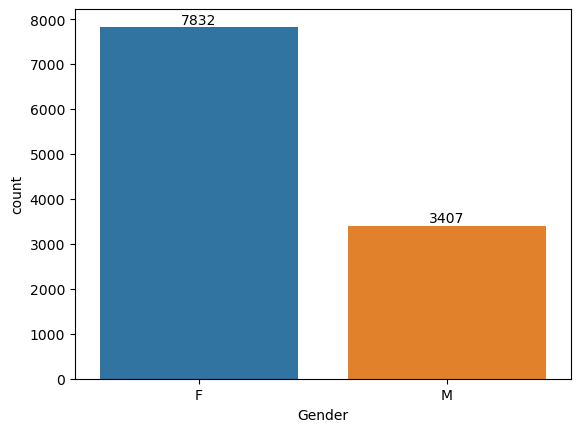

In [15]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [16]:
grouped_gender = df.groupby(['Gender'], as_index = False)

In [17]:
sales_gen = grouped_gender['Amount'].sum().sort_values(by='Amount', ascending = False)
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


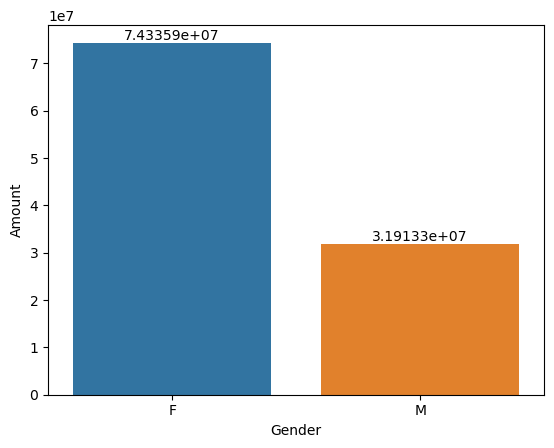

In [18]:
ax1 = sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)
for bars in ax1.containers:
    ax1.bar_label(bars)

### women shop more than men and their purchasing power is also greater than theirs

## Age

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

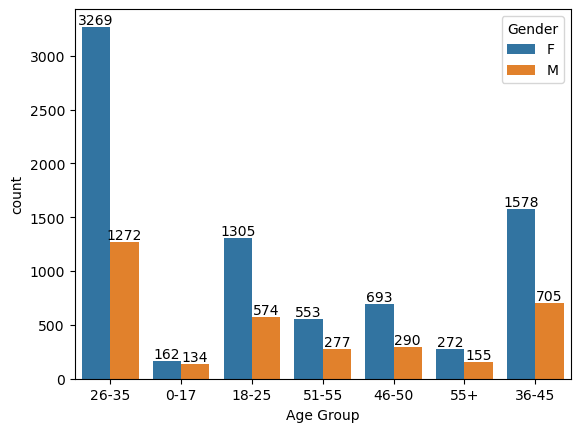

In [20]:
ax2 = sns.countplot(data = df, x= 'Age Group', hue = 'Gender')
for bars in ax2.containers:
    ax2.bar_label(bars)

### most of the customers are women between the age of 26-35

In [21]:
grouped_age = df.groupby(['Age Group'], as_index = False)

In [22]:
sales_age_grp = grouped_age['Amount'].sum().sort_values(by='Amount',ascending = False)
sales_age_grp

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


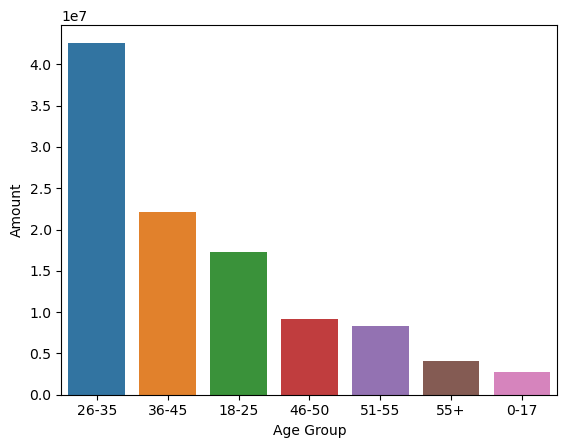

In [23]:
ax3 = sns.barplot(x='Age Group',y = 'Amount', data = sales_age_grp)


### most money has been spent by women between the age of 26-35

## state

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [25]:
grouped_state = df.groupby(['State'],as_index = False)

In [26]:
sales_orders = grouped_state['Orders'].sum().sort_values(by='Orders',ascending = False)
sales_orders

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


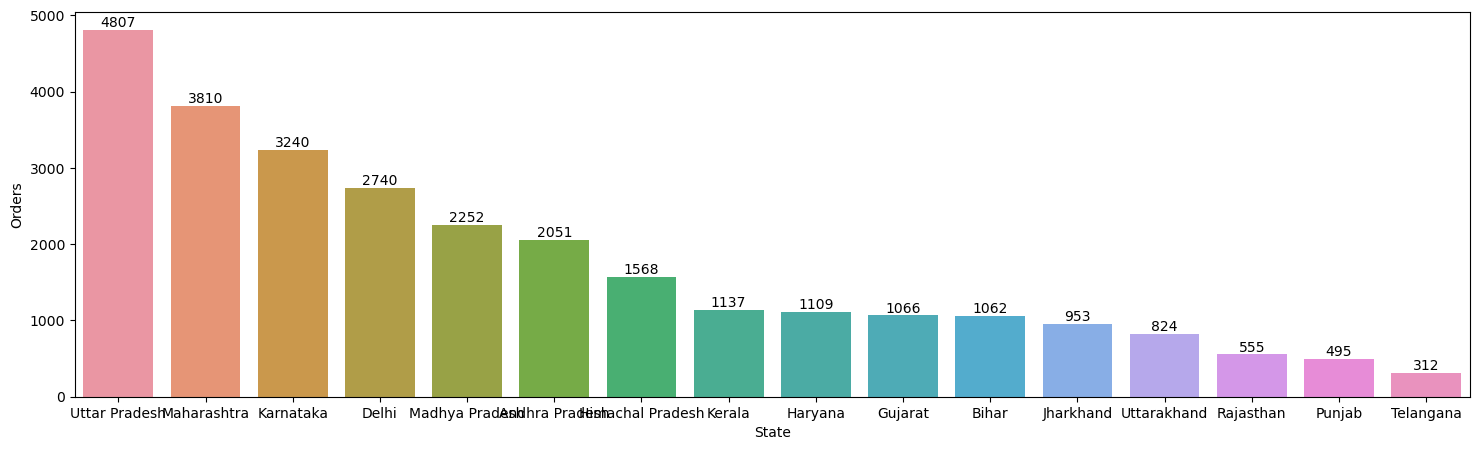

In [27]:
plt.figure(figsize = (18,5))
ax4 = sns.barplot(data = sales_orders, x = 'State', y ='Orders')
for bars in ax4.containers:
    ax4.bar_label(bars)

## most of the orders were placed in Uttar Pardesh

In [28]:
sales_orders.head(10)

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


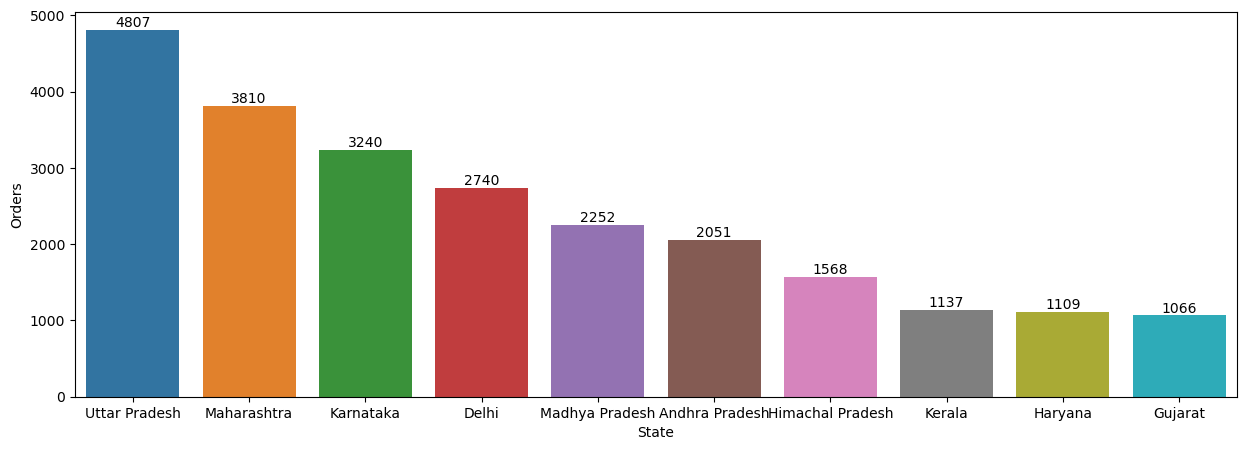

In [29]:
plt.figure(figsize = (15,5))
ax5 = sns.barplot(data = sales_orders.head(10), x = 'State', y ='Orders')
for bars in ax5.containers:
    ax5.bar_label(bars)

### these are top 10 states in which most orders were placed

In [30]:
sales_orders.tail(10)

,State,Orders
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066
1,Bihar,1062
6,Jharkhand,953
15,Uttarakhand,824
12,Rajasthan,555
11,Punjab,495
13,Telangana,312


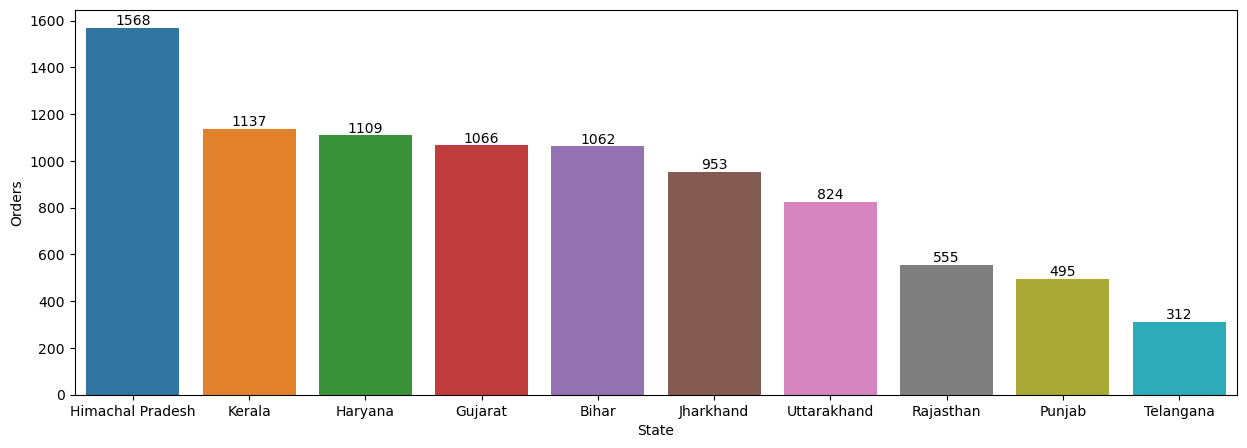

In [31]:
plt.figure(figsize = (15,5))
ax6 = sns.barplot(data = sales_orders.tail(10), x = 'State', y ='Orders')
for bars in ax6.containers:
    ax6.bar_label(bars)

### these are those 10 states in which the least number of orders were placed

In [32]:
sales_amount = grouped_state['Amount'].sum().sort_values(by='Amount',ascending = False)
sales_amount

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


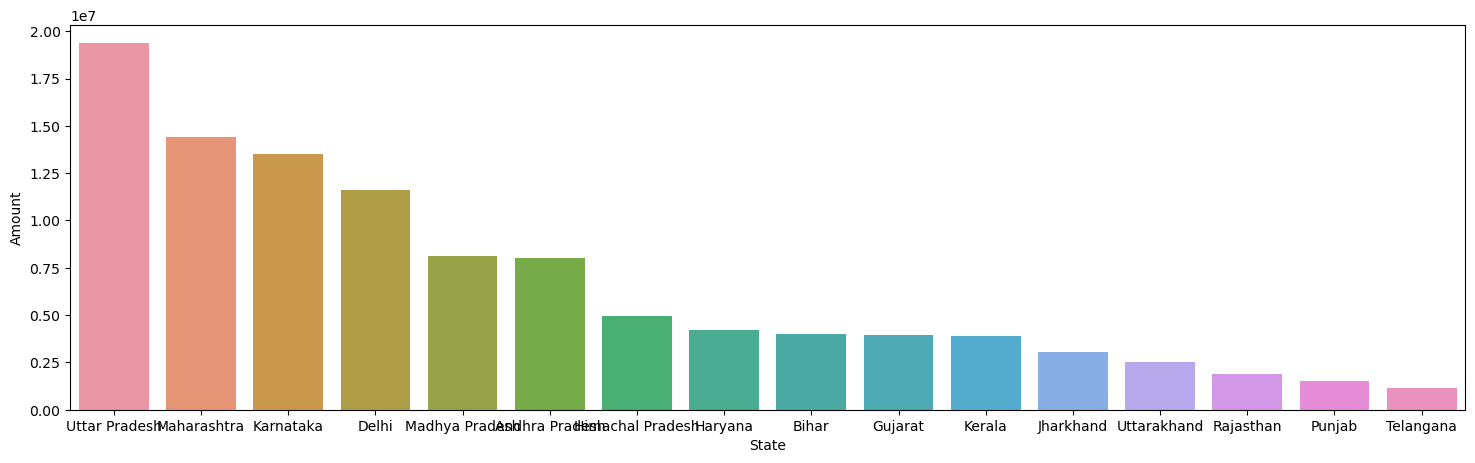

In [33]:
plt.figure(figsize = (18,5))
ax7 = sns.barplot(data = sales_amount, x='State',y='Amount')

### most of the amount was spent in Uttar Pardesh

In [34]:
sales_amount.head(10)

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


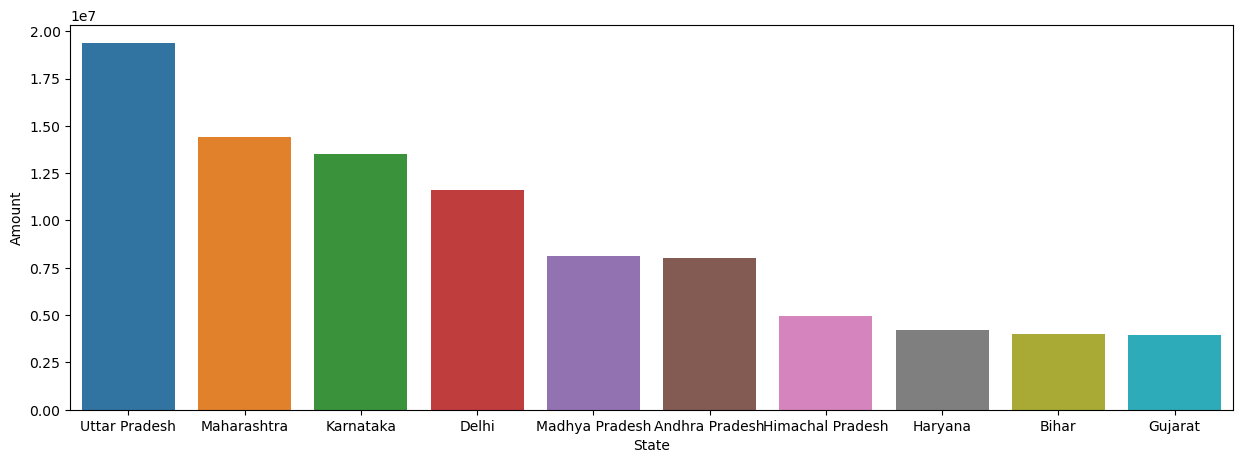

In [35]:
plt.figure(figsize = (15,5))
ax8 = sns.barplot(data = sales_amount.head(10), x='State',y='Amount')

### these are those top 10 states in which the most amount of money was spent

In [36]:
sales_amount.tail(10)

,State,Amount
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082
8,Kerala,3894491
6,Jharkhand,3026456
15,Uttarakhand,2520944
12,Rajasthan,1909409
11,Punjab,1525800
13,Telangana,1151490


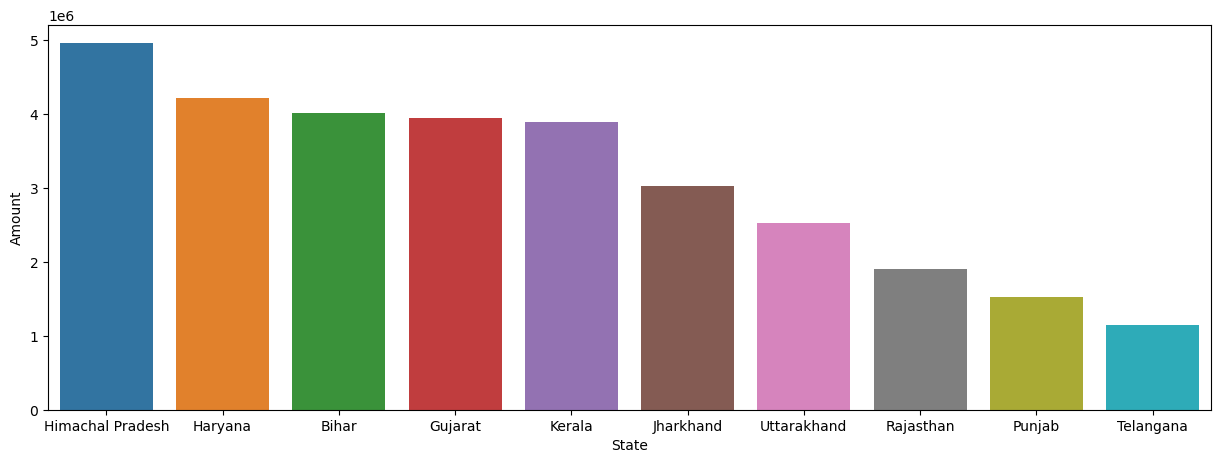

In [37]:
plt.figure(figsize = (15,5))
ax7 = sns.barplot(data = sales_amount.tail(10), x='State',y='Amount')

### these are those 10 states in which the least amount of money was spent

In [38]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Marital status

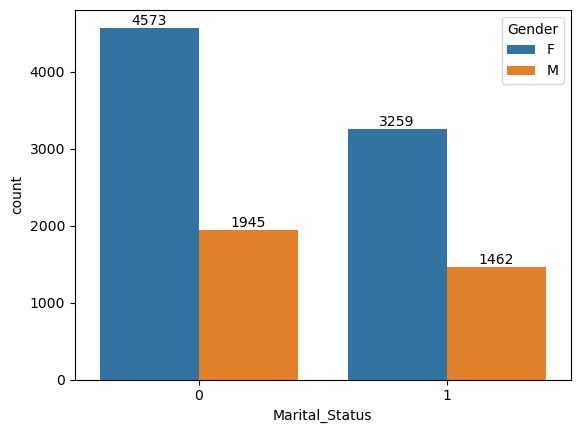

In [39]:
ax8 = sns.countplot(data = df, x='Marital_Status', hue ='Gender')
for bars in ax8.containers:
    ax8.bar_label(bars)

In [40]:
grouped_m = df.groupby(['Marital_Status','Gender'],as_index = False)

In [41]:
count_m = grouped_m['Amount'].sum().sort_values(by='Amount',ascending = False)
count_m

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


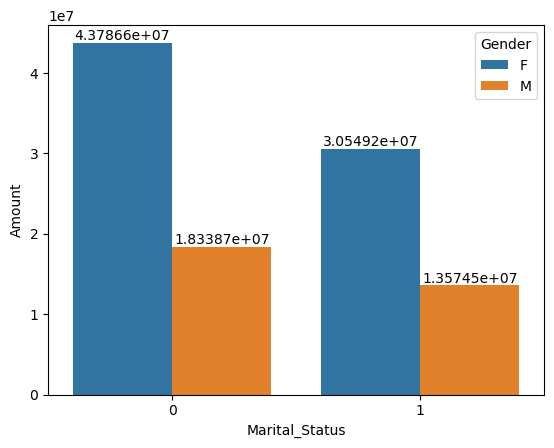

In [42]:
ax9 = sns.barplot(x='Marital_Status', y ='Amount', data = count_m, hue='Gender')
for bars in ax9.containers:
    ax9.bar_label(bars)

   ### married women have the highest puchasing power as they have spent the most money

## Occupation

In [43]:
df['Occupation'].unique()

array(['Healthcare', 'Govt', 'Automobile', 'Construction',
       'Food Processing', 'Lawyer', 'Media', 'Banking', 'Retail',
       'IT Sector', 'Aviation', 'Hospitality', 'Agriculture', 'Textile',
       'Chemical'], dtype=object)

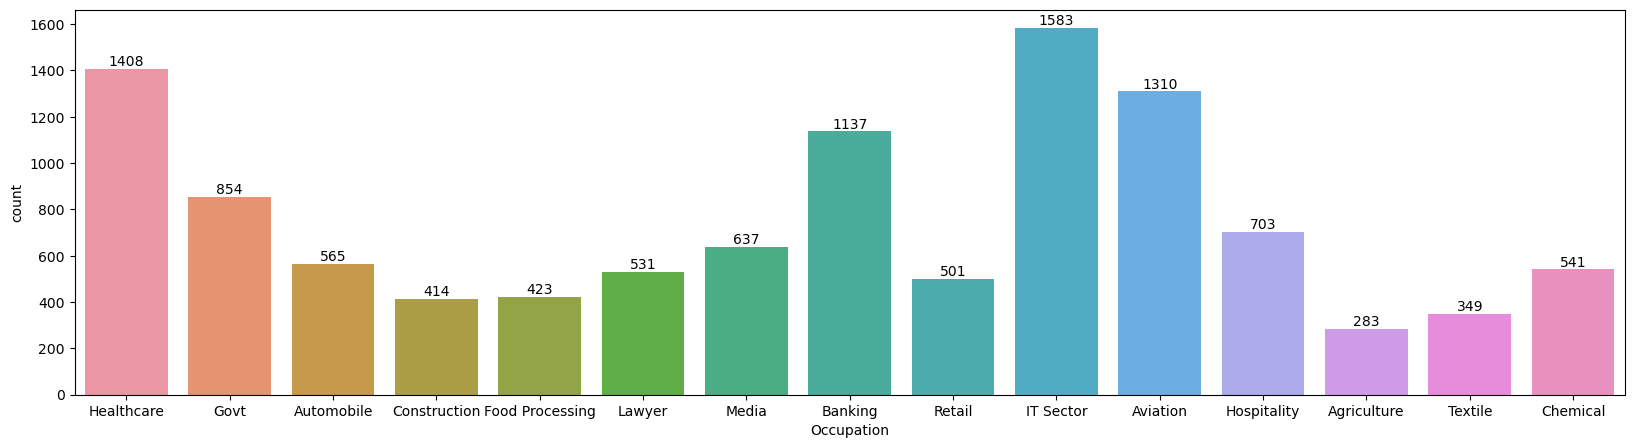

In [44]:
plt.figure(figsize =(20,5))
ax10= sns.countplot(data = df, x = 'Occupation')
for bars in ax10.containers:
    ax10.bar_label(bars)

In [45]:
grouped_o = df.groupby(['Occupation'],as_index = False)

In [46]:
sales_o = grouped_o['Amount'].sum().sort_values(by=['Amount'],ascending = False)
sales_o

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


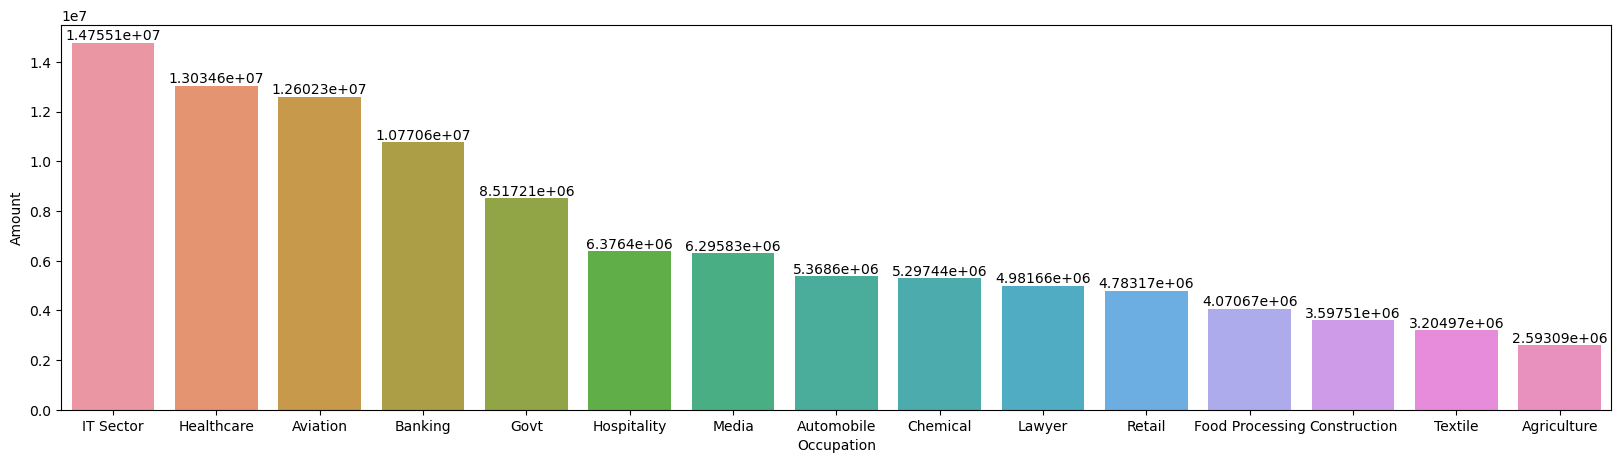

In [47]:
plt.figure(figsize = (20,5))
ax11= sns.barplot(x ='Occupation',y='Amount',data = sales_o)
for bars in ax11.containers:
    ax11.bar_label(bars)

### people from IT Healthcare and Aviation have spent the most amount of money

In [48]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## Product Category

In [49]:
df['Product_Category'].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

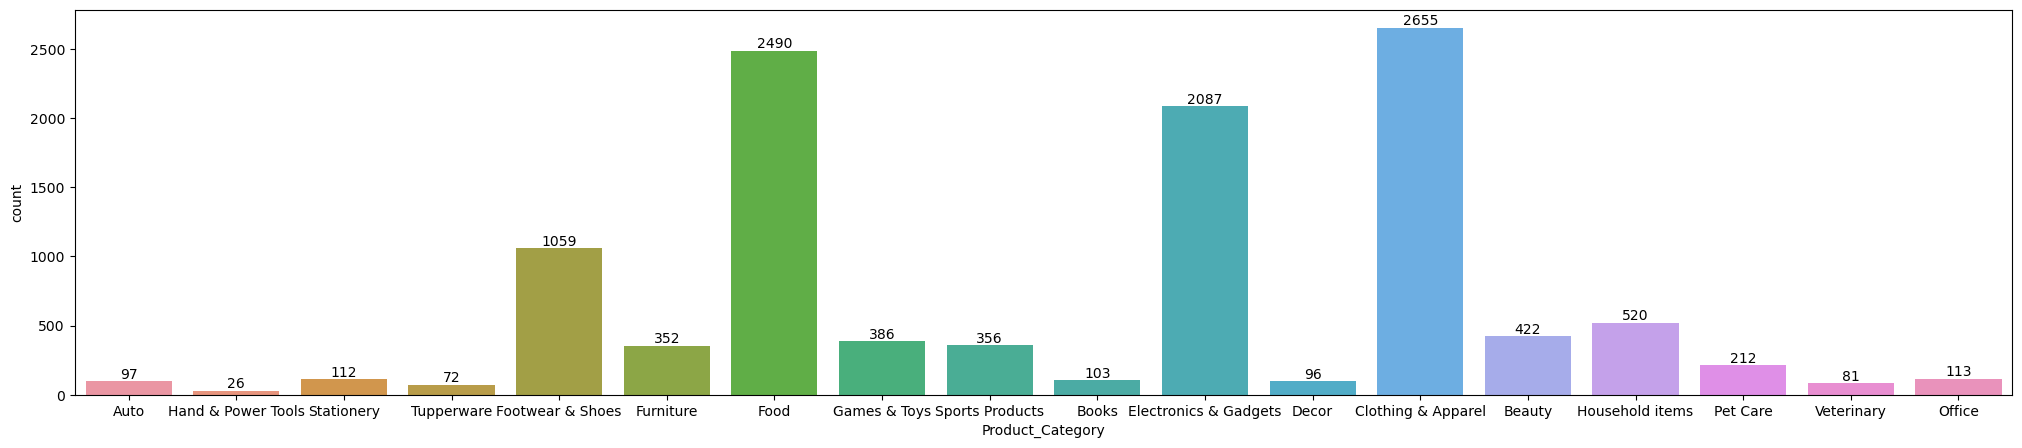

In [50]:
plt.figure(figsize=(25,5))
ax15 = sns.countplot(x='Product_Category',data = df)
for bars in ax15.containers:
    ax15.bar_label(bars)

### here we can see that most orders were placed of clothing and apparel

In [51]:
grouped_p = df.groupby(['Product_Category'],as_index = False)

In [52]:
sales_p = grouped_p['Amount'].sum().sort_values(by='Amount',ascending = False)
sales_p

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


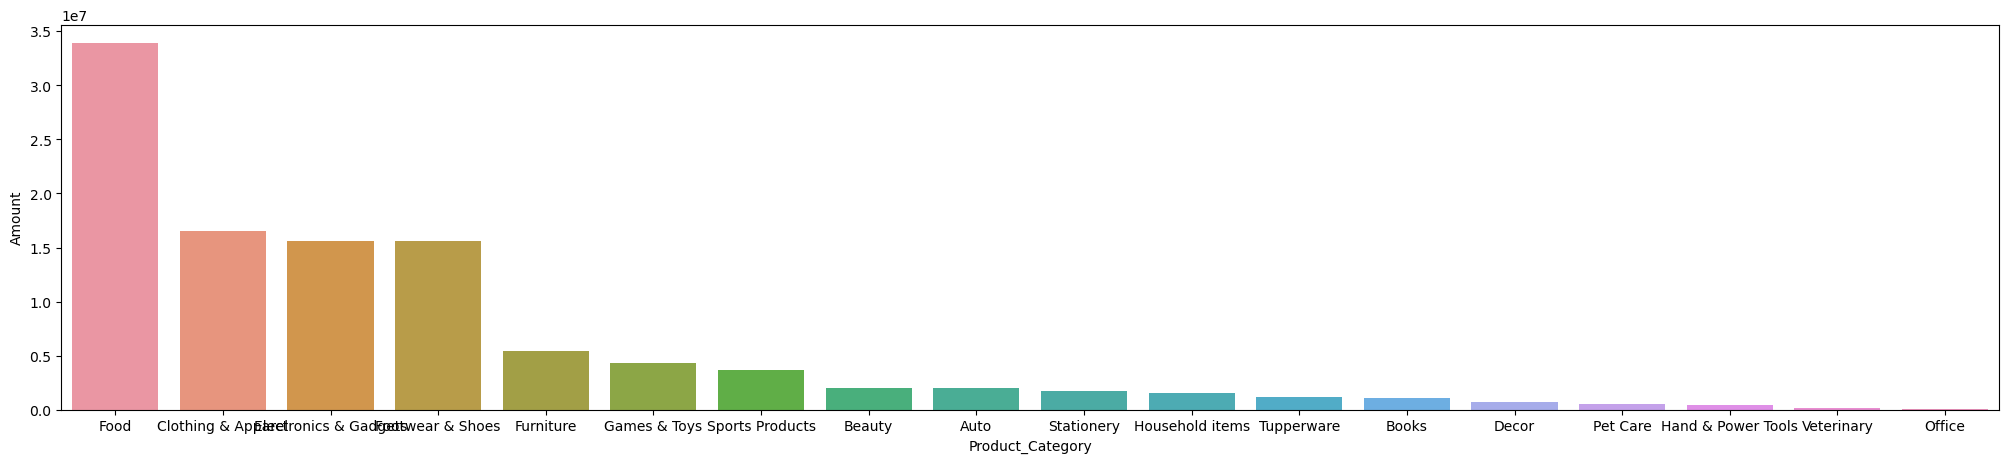

In [53]:
plt.figure(figsize = (25,5))
ax12 = sns.barplot(x='Product_Category',y='Amount',data = sales_p)

In [54]:
sales_p.head(10)

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


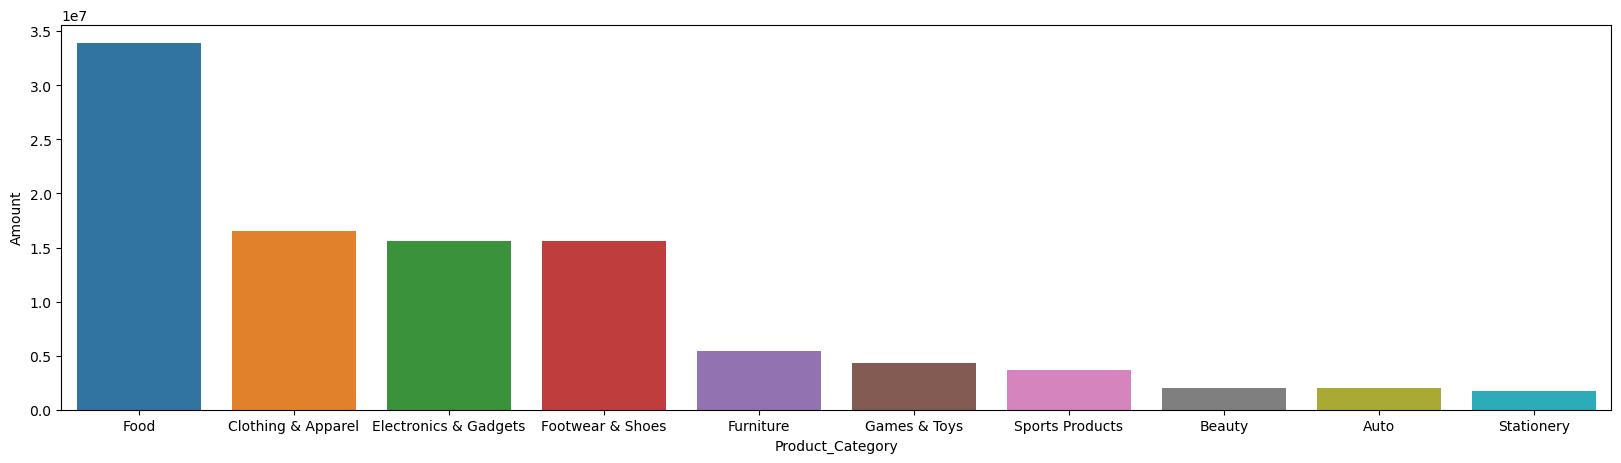

In [55]:
plt.figure(figsize = (20,5))
ax13 = sns.barplot(x='Product_Category',y='Amount',data = sales_p.head(10))

### these are to 10 product categories on which the most ammount has been spent

In [56]:
sales_p.tail(5)

,Product_Category,Amount
4,Decor,730360
13,Pet Care,482277
10,Hand & Power Tools,405618
17,Veterinary,112702
12,Office,81936


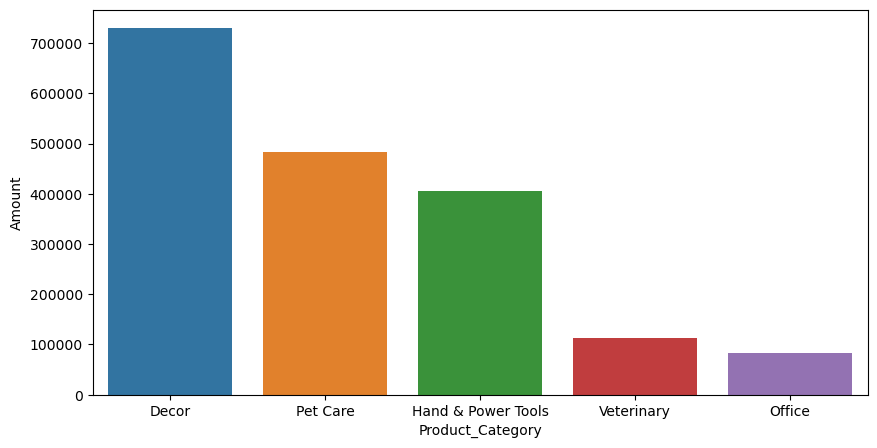

In [57]:
plt.figure(figsize = (10,5))
ax14 = sns.barplot(x='Product_Category',y='Amount',data = sales_p.tail(5))

### these are those 5 product categories on which the most amount of money has been spent

In [58]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## product ID

<Axes: xlabel='Product_ID'>

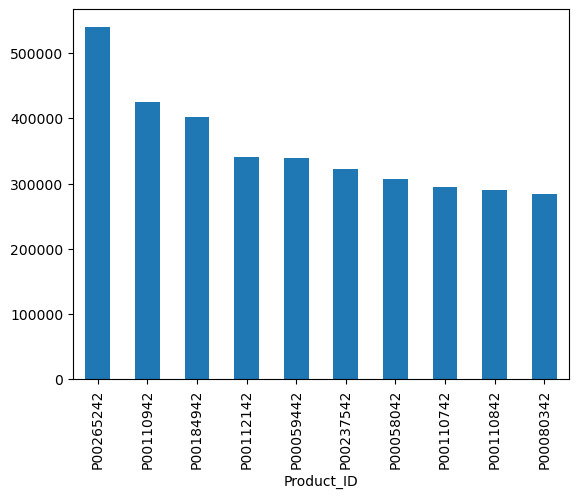

In [62]:
group_id = df.groupby(['Product_ID'])
sales_id = group_id['Amount'].sum().nlargest(10).sort_values(ascending = False).plot(kind='bar')
sales_id

# Conclusion:

#### Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics categor